# Logfile Summary 16.03.2016  - test

Here I summarize the interesting/suspicius/special logs, I found in tonights logfile. 
Maybe something similar can be part of a future auto shift summary. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import logfile_parser

plt.rcParams["figure.figsize"] = (14, 4)
plt.rcParams["font.size"] = 14
plt.rcParams["figure.dpi"] = 120

# monkey patch pandas DataFrame for nicer tables in Latex
pd.set_option('display.notebook_repr_html', True)
def _repr_latex_(self):
    return "\centering{%s}" % self.to_latex()
pd.DataFrame._repr_latex_ = _repr_latex_ 

Lets open the logfile and and see how many warnings and errors we've got tonight. We can assume errors and warnings are more imporant than infos and unmarked logs.

In [2]:
logs = logfile_parser.logfile2dataframe("20160316.log")
logs.severity.value_counts()

-    71422
I    27214
#      937
W       40
E       17
dtype: int64

## Errors

In [3]:
error_log = logs[logs.severity == "E"]
error_log

,severity,server,state,message
time,,,,
2016-03-16 16:27:12.304,E,AGILENT_CONTROL_80V,NaN,String conversion failed for 'Agilent Technolo...
2016-03-16 17:01:12.406,E,AGILENT_CONTROL_80V,NaN,String conversion failed for 'Agilent Technolo...
2016-03-16 20:13:20.719,E,FEEDBACK,NaN,Current limit for shutdown exceeded.... swtchi...
2016-03-17 01:30:57.774,E,AGILENT_CONTROL_80V,NaN,String conversion failed for 'Agilent Technolo...
2016-03-17 06:21:04.163,E,DRIVE_CONTROL,NaN,Target position not reached in 10 steps.
2016-03-17 06:25:23.716,E,DIM_CONTROL,NaN,| scripts/Main.js: l.449: Error: Waiting for s...
2016-03-17 06:25:23.716,E,DIM_CONTROL,NaN,"| dim.wait(""DRIVE_CONTROL"", ""Locked"", 1500..."
2016-03-17 06:25:23.716,E,DIM_CONTROL,NaN,| ^
2016-03-17 06:25:23.718,E,DIM_CONTROL,NaN,|


So every now and then, the AGILENT_CONTROL_80V cannot understand what the hardware is trying to say. This is a pretty freqent message, so maybe something should be done about it. But generally this server seems to perform well.

FEEDBACK shows up in the evening. It worked correctly as it was setting down the bias voltage to standby mode, due to elevated currents.

And we see the little shutdown problems in the monring, where the PositioningFailed. Which is nothing really new. 
The errors at 06:33:57.9 occur when the drive cabinet is shut down, and are absolutely normal. Nothing to worry about. 
In fact, I would worry a bit if I didn't see them.

## Warnings

In [4]:
warnings = logs[logs.severity == "W"]

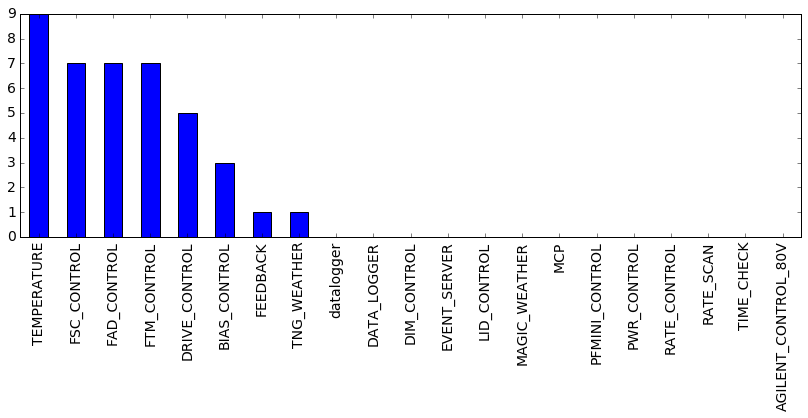

In [5]:
warnings.server.value_counts().plot.bar()

So we have a cople of warnings from TEMPERATURE, FSC_CONTROL, FTM_CONTROL and FAD_CONTROL, let's look at them

In [6]:
warnings.query("server == 'TEMPERATURE'")

,severity,server,state,message
time,,,,
2016-03-16 20:01:43.594,W,TEMPERATURE,NaN,Parsing of JSON failed: <unspecified file>(1):...
2016-03-17 00:28:44.010,W,TEMPERATURE,NaN,Parsing of JSON failed: <unspecified file>(1):...
2016-03-17 02:55:44.224,W,TEMPERATURE,NaN,Parsing of JSON failed: <unspecified file>(1):...
2016-03-17 02:57:44.062,W,TEMPERATURE,NaN,Parsing of JSON failed: <unspecified file>(1):...
2016-03-17 04:20:44.233,W,TEMPERATURE,NaN,Parsing of JSON failed: <unspecified file>(1):...
2016-03-17 05:12:44.317,W,TEMPERATURE,NaN,Parsing of JSON failed: <unspecified file>(1):...
2016-03-17 05:13:44.247,W,TEMPERATURE,NaN,Parsing of JSON failed: <unspecified file>(1):...
2016-03-17 05:53:44.438,W,TEMPERATURE,NaN,Parsing of JSON failed: <unspecified file>(1):...
2016-03-17 06:05:44.303,W,TEMPERATURE,NaN,Parsing of JSON failed: <unspecified file>(1):...


Similar to the AGILENT_CONTROL_80V this server seems to sometimes be unable to read, what was maybe told. Or the input is simply damaged. This happens every now and then, and should maybe taken care of. For the logfile summary, just counting these specific warnings should be okay, I guess.

In [7]:
warnings.query("server == 'FSC_CONTROL'")

,severity,server,state,message
time,,,,
2016-03-16 13:01:56.395,W,FSC_CONTROL,NaN,"Checksum error (V:d4b6|79ed, R:dfb0|99a8, Nok..."
2016-03-16 13:31:14.462,W,FSC_CONTROL,NaN,"Checksum error (V:d910|95b2, R:489d|bdd3, Nok..."
2016-03-16 16:07:06.714,W,FSC_CONTROL,NaN,"Checksum error (V:2a30|672b, R:1459|3367, Nok..."
2016-03-16 16:22:07.853,W,FSC_CONTROL,NaN,"Checksum error (V:36dc|4cc4, R:78d0|1712, Nok..."
2016-03-16 21:59:28.896,W,FSC_CONTROL,NaN,"Checksum error (V:d872|43dc, R:c17a|cdbf, Nok..."
2016-03-16 22:01:26.970,W,FSC_CONTROL,NaN,"Checksum error (V:8681|0054, R:6ddf|832d, Nok..."
2016-03-17 02:21:43.545,W,FSC_CONTROL,NaN,"Checksum error (V:8f55|0adb, R:e867|3e40, Nok..."


These are very well known meesages. Every now and then the FSC sends a broken message. Counting them per night should be interesting as well, I guess.

In [8]:
warnings.query("server == 'FTM_CONTROL'")

,severity,server,state,message
time,,,,
2016-03-16 21:48:17.665,W,FTM_CONTROL,NaN,SET_SELECTED_THRESHOLDS: Not allowed in state ...
2016-03-16 22:30:03.438,W,FTM_CONTROL,NaN,SET_SELECTED_THRESHOLDS: Not allowed in state ...
2016-03-17 01:00:22.185,W,FTM_CONTROL,NaN,SET_SELECTED_THRESHOLDS: Not allowed in state ...
2016-03-17 01:41:55.595,W,FTM_CONTROL,NaN,SET_SELECTED_THRESHOLDS: Not allowed in state ...
2016-03-17 03:55:53.535,W,FTM_CONTROL,NaN,SET_SELECTED_THRESHOLDS: Not allowed in state ...
2016-03-17 05:00:11.355,W,FTM_CONTROL,NaN,SET_SELECTED_THRESHOLDS: Not allowed in state ...
2016-03-17 05:41:28.867,W,FTM_CONTROL,NaN,SET_SELECTED_THRESHOLDS: Not allowed in state ...


These are new to me personally, so lets have a look at the complete text.

In [9]:
warnings.query("server == 'FTM_CONTROL'").message.values

array(['SET_SELECTED_THRESHOLDS: Not allowed in state Valid[4]... ignored.',
       'SET_SELECTED_THRESHOLDS: Not allowed in state Valid[4]... ignored.',
       'SET_SELECTED_THRESHOLDS: Not allowed in state Valid[4]... ignored.',
       'SET_SELECTED_THRESHOLDS: Not allowed in state Valid[4]... ignored.',
       'SET_SELECTED_THRESHOLDS: Not allowed in state Valid[4]... ignored.',
       'SET_SELECTED_THRESHOLDS: Not allowed in state Valid[4]... ignored.',
       'SET_SELECTED_THRESHOLDS: Not allowed in state Valid[4]... ignored.'], dtype=object)

This is maybe a more interesting warning. It looks like we sometimes send a command "SET_SELECTED_THRESHOLDS" to the FTM_CONTROL, while this makes no sense and is not allowed. I wonder why this is the case. Maybe its just a matter of time.. maybe a second later the FTM_CONTROL was in a state where getting this command made sense.



In [10]:
warnings.query("server == 'FAD_CONTROL'")

,severity,server,state,message
time,,,,
2016-03-16 21:27:14.198,W,FAD_CONTROL,NaN,Could not reset DRS calibration of secondary b...
2016-03-16 22:52:41.226,W,FAD_CONTROL,NaN,Could not reset DRS calibration of secondary b...
2016-03-17 00:17:53.461,W,FAD_CONTROL,NaN,Could not reset DRS calibration of secondary b...
2016-03-17 01:43:38.190,W,FAD_CONTROL,NaN,Could not reset DRS calibration of secondary b...
2016-03-17 03:08:27.119,W,FAD_CONTROL,NaN,Could not reset DRS calibration of secondary b...
2016-03-17 04:39:06.043,W,FAD_CONTROL,NaN,Could not reset DRS calibration of secondary b...
2016-03-17 06:03:56.661,W,FAD_CONTROL,NaN,Could not reset DRS calibration of secondary b...


In [11]:
warnings.query("server == 'DRIVE_CONTROL'")

,severity,server,state,message
time,,,,
2016-03-16 19:45:47.229,W,DRIVE_CONTROL,NaN,Connecting to 192.168.1.2:5357: Connection ref...
2016-03-17 06:30:33.101,W,DRIVE_CONTROL,NaN,PARK: Not allowed in state PositioningFailed[2...
2016-03-17 06:32:02.163,W,DRIVE_CONTROL,NaN,STOP: Not allowed in state PositioningFailed[2...
2016-03-17 06:33:57.968,W,DRIVE_CONTROL,NaN,IndraDrive Az [e2819]: Main power failure!
2016-03-17 06:33:57.978,W,DRIVE_CONTROL,NaN,IndraDrive Zd [e2819]: Main power failure!


Here we see the first connection attempt in the evening. And my tries in the morning to get the system parked after PositioningFailure. And again the warnings, when I shut down the drive cabinet.

Well, that's it for the start. I would also be interesting to have a look at the logs not from a severity point of view,
but by saying: What writes a lot into the logfile might need more of our attention. So if I had more time, I could study this last plot in more details.

## By Frequency

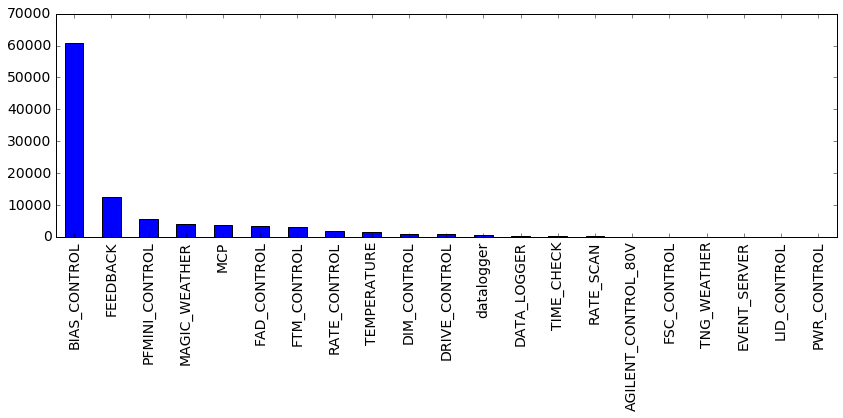

In [12]:
logs.server.value_counts().plot.bar()